In [71]:
import pandas as pd

from IPython.display import display

import matplotlib.pyplot as plt
# меняем стиль отображения для тёмной темы
plt.style.use('default')

import seaborn as sns

import plotly.express as px

In [72]:
# импортируем данные из csv и отображаем первые пять строк
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
# избавляемся от столбца RowNumer, так как он не несёт важной информации
churn_data = churn_data.drop('RowNumber', axis=1)

# для корректного отображения распределения по признаку оттока, назначим столбцу Exited тип category 
churn_data['Exited'] = churn_data['Exited'].astype('category')

# для корректного отображения распределения по признаку оттока, назначим столбцу IsActiveMember тип category 
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('category')

--------------------------------------------------------------------------------------------------------------------------------------------------------------
# **Задание 9.1** # 

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [93]:
fig = px.pie(churn_data, 
             values=churn_data['Exited'].value_counts(), 
             names=['Лояльные клиенты', 'Ушедшие клиенты'],
             title='Соотношение лояльных и ушедших клиентов',
             height=500,
             width=600
             )
fig.show() 

Text(0.5, 1.0, 'Доля мужчин и женщин среди ушедших клиентов')

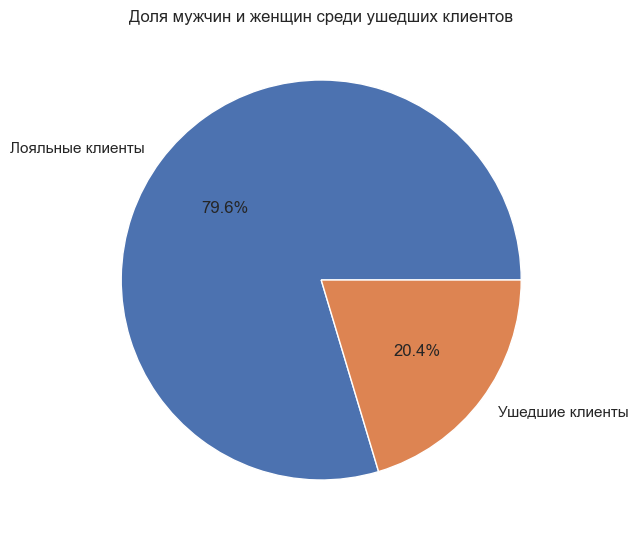

In [110]:
# Создаем копию DF для изменения названий осей
churn_data_copy = churn_data
# Задаем осям понятные названия
churn_data_copy['Лояльность клиента'] = churn_data_copy['Exited'].apply(lambda x: 'Лояльные клиенты' if x == 0 else 'Ушедшие клиенты')

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(churn_data_copy['Лояльность клиента'].value_counts(), 
         labels=churn_data_copy['Лояльность клиента'].value_counts().index, 
         autopct='%.1f%%'
        ) 

axes.set_title('Доля мужчин и женщин среди ушедших клиентов') 

### **Комментарий к заданию 9.1:** ###

*Так как все клиенты банка в совокупности рассматриваются как 100%, то для отображения соотношения лояльных и ушедших клиентов 
можно использовать круговую диаграмму.*

*Круговая диаграмма наглядно показывает, что на момент наблюдения лояльных клиентов - 79,6%, а ушедших - 20,4%*

--------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Задание 9.2** #

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.

Опишите распределение и сделайте выводы.


Text(0.5, 1.0, 'Распределение баланса пользователей')

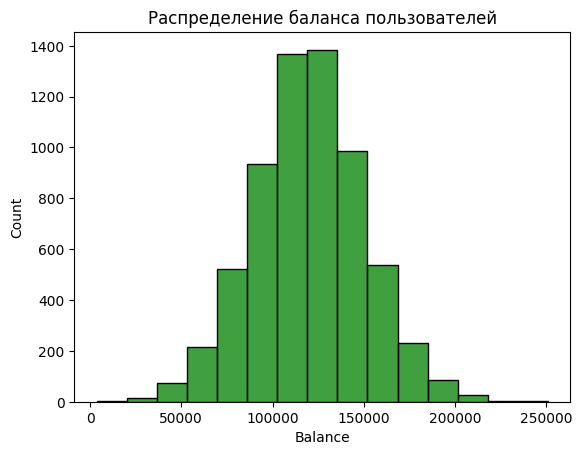

In [75]:
# для выполнения задания создаем DataFrame, путем использваония маски, которая отсекает всех пользователей с балансом ниже 2500.
big_balance_df = churn_data[churn_data['Balance'] > 2500]

histplot = sns.histplot(data=big_balance_df,
                        x='Balance',
                        bins=15,
                        color='green'
                        )

histplot.set_title('Распределение баланса пользователей')

### **Комментарий к заданию 9.2:** ###

*Для визуализации распределения баланса клиентов банка по категориям подойдет гистограмма, количество категорий в данном графике равно 15.*

*Распределение клиентов близк к "нормальному".*

*На графике мы видим, что основная масса клиентов имеет на своих счетах в среднем от 90 до 150 тысяч.*
*Количество клиентов с балансом более 200 тысяч крайне мало, как и клиентов с балансом от 2,5 до 35 тысяч.*

*Можно построить коробочную диаграмму, она покажет похожий результат, но внимание отвлекают "выбросы" и в целом в данном случае мне больше нравится именно гистограмма.*

--------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Задание 9.3** #

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 

Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

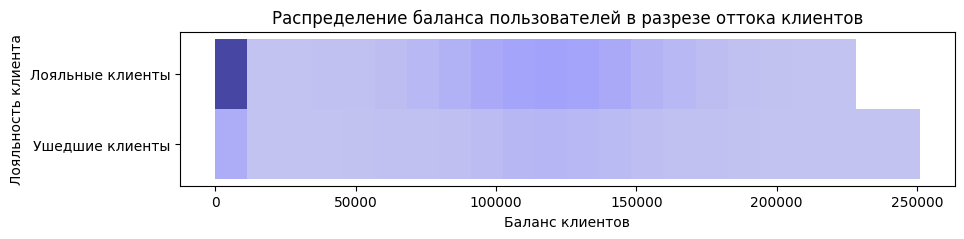

In [76]:
# Создаем копию DF для изменения названий осей
churn_data_copy = churn_data

# Задаем осям понятные названия
churn_data_copy['Лояльность клиента'] = churn_data_copy['Exited'].apply(lambda x: 'Лояльные клиенты' if x == 0 else 'Ушедшие клиенты')
churn_data_copy['Баланс клиентов'] = churn_data_copy['Balance']

# строим гистограмму
fig = plt.figure(figsize=(10, 2))

histplot = sns.histplot(data=churn_data_copy,
                        x='Баланс клиентов',
                        y='Лояльность клиента',
                        color='blue'
                        )

histplot.set_title('Распределение баланса пользователей в разрезе оттока клиентов')
histplot.set_yticks([0, 1])

Text(0.5, 1.0, 'Распределение баланса пользователей в разрезе оттока клиентов')

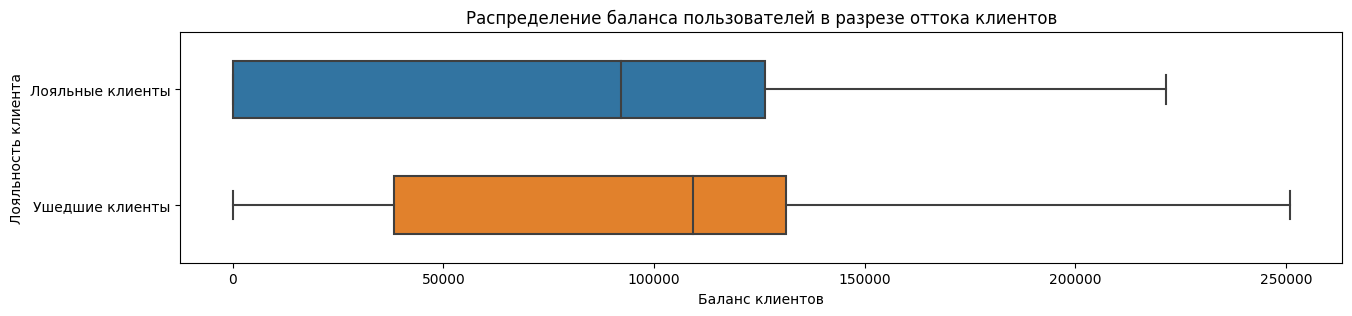

In [77]:
# строим коробочную диаграмму
fig = plt.figure(figsize=(15, 3))

boxplot = sns.boxplot(data=churn_data_copy,
                      x='Баланс клиентов',
                      y='Лояльность клиента',
                      orient='h',
                      width=0.5
                      )

boxplot.set_title('Распределение баланса пользователей в разрезе оттока клиентов')

### **Комментарий к заданию 9.3:** ###

*Для визуализации взаимосвязи суммы накоплений на счетах ушедших и лояльных клиентов можно использовать гистограмму и/или коробочную диаграмму.*

*В целом средства ушедших и лояльных клиентов распределяются схожим образом.*

*Среди лояльных клиентов много клиентов, чей баланс близок к нулевому, это влияет на смещение медианы в сторону нуля.*

*Среди "ненулевых клиентов" основная часть средств клиентов находится около значения в 100 000.*
*На гистограмме более тёмные участки у лояльных клиентов обуславливаются их бОльшим количеством.*

*Мы видим, что среди ушедших клиентов есть люди с самыми большими накоплениями, возможно для таких "VIP-клиентов" услуги банка недостаточно хороши, но это лишь предположение, которое надо исследовать.*

*Из графика можно сделать вывод, что сумма накоплений не имеет сильного влияния на лояльность.*
*Многие лояльные клиенты не успели или не стали пока что пополнять свои счета в банке, скорее всего это "свежие" клиенты.*

--------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Задание 9.4** #
Посмотрите на распределение возраста в разрезе признака оттока/

В какой группе больше потенциальных выбросов? 

На какую возрастную категорию клиентов стоит обратить внимание банку?

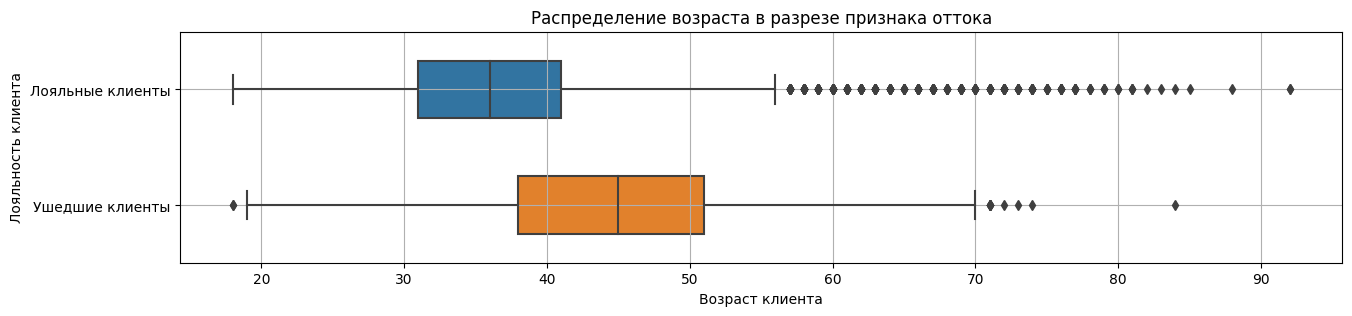

In [78]:
fig = plt.figure(figsize=(15, 3))

# Создаем копию DF для изменения названий осей и легенды
churn_data_copy = churn_data

# Задаем осям и легенде понятные названия
churn_data_copy['Лояльность клиента'] = churn_data_copy['Exited'].apply(lambda x: 'Лояльные клиенты' if x == 0 else 'Ушедшие клиенты')
churn_data_copy['Возраст клиента'] = churn_data_copy['Age']

boxplot = sns.boxplot(data=churn_data_copy,
                      x='Возраст клиента',
                      y='Лояльность клиента',
                      orient='h',
                      width=0.5
                      )

boxplot.set_title('Распределение возраста в разрезе признака оттока')
boxplot.grid()                     

### **Комментарий к заданию 9.4:** ###

*Для распределения возраста в разрезе признака оттока удобно использовать коробчатую диаграмму.*

*Из графика мы можем сделать вывод, что лояльные клиенты в основной массе моложе ушедших.*
*Медианный возраст лояльных клиентов составляет 36 лет, а ушедших - 45.*
*Лояльные клиенты имеют много "выбросов" среди клиентов старше 55 лет.*

*Если молодые клиенты остаются с банком чаше, чем старшие, то банку надо задуматься об удерживании клиентов в возрасте от 35 до 50 лет, не потеряв при этом и молодую аудиторию.*
*Помня, что именно у ушедших клиентов были самые большие вклады, можно подкрепить вывод о том, что услуги банка не ориентированы на взрослых, солидных "VIP-клиентов".*

--------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Задание 9.5** #

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 

Добавьте расцветку по признаку оттока клиентов. 

Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

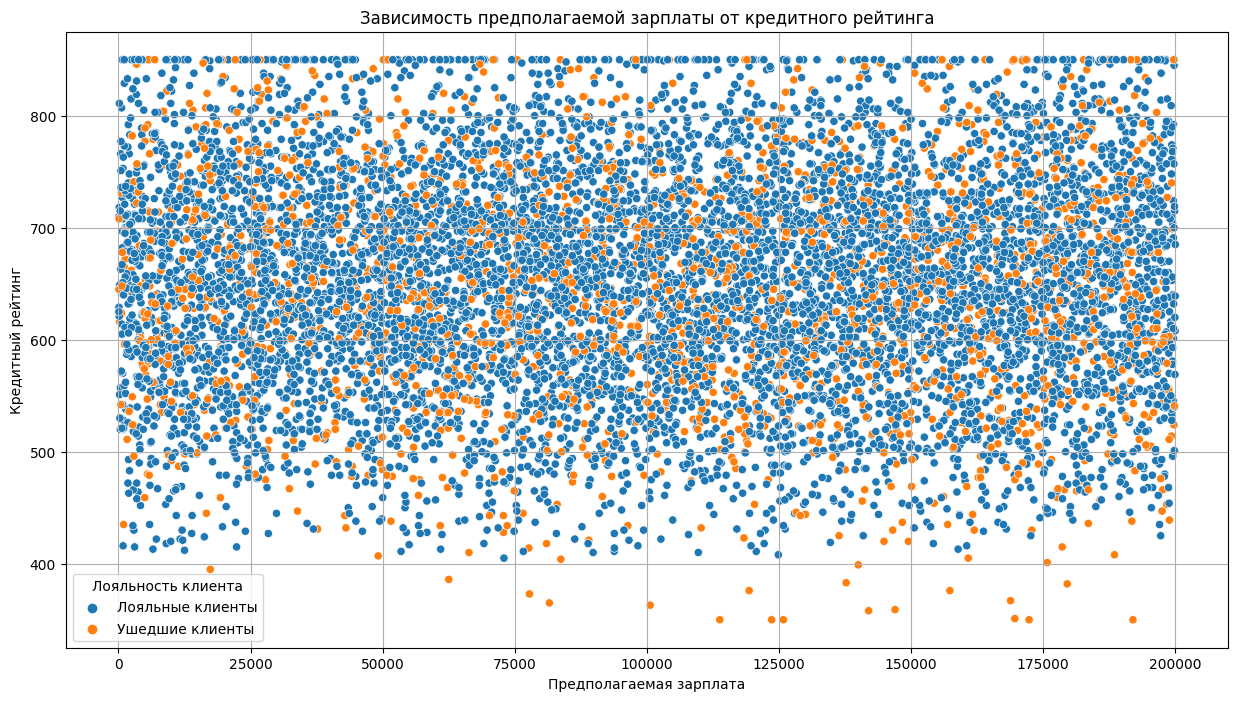

In [79]:
# Создаем копию DF для изменения названий осей и легенды
churn_data_copy = churn_data

# Задаем осям и легенде понятные названия
churn_data_copy['Лояльность клиента'] = churn_data_copy['Exited'].apply(lambda x: 'Лояльные клиенты' if x == 0 else 'Ушедшие клиенты')
churn_data_copy['Кредитный рейтинг'] = churn_data_copy['CreditScore']
churn_data_copy['Предполагаемая зарплата'] = churn_data_copy['EstimatedSalary']

fig = plt.figure(figsize=(15, 8))

scatterplot = sns.scatterplot(data=churn_data_copy,
                              x='Предполагаемая зарплата', 
                              y='Кредитный рейтинг',
                              hue='Лояльность клиента'
                              )

scatterplot.set_title('Зависимость предполагаемой зарплаты от кредитного рейтинга')
scatterplot.grid() 

### **Комментарий к заданию 9.5:** ###

*Явной зависимости кредитного рейтинга от предполагаемой зарплаты нет.*

*Основная масса клиентов имеет средний рейтинг (500-750).*
*Многие клиенты достигли "потолка" (850).*

*Ушедшие и лояльные клиенты распределены схожим образом, однако, мы видим, что среди клиентов с низким рейтингом (ниже 400) нет лояльных клиентов.*

*Так же удивляет, что клиенты с низким уровнем предполагаемой зарплаты имеют схожее распределение по рейтингу, как и клиенты с высокой зарплатой.*

--------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Задание 9.6** #

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [114]:
# Так как надо произвести сравнение ушедших клиентов, то создаем DF содержащий только ушедших клиентов
exited_df = churn_data[churn_data['Exited'] == 1]

# Задаем осям понятные названия
exited_df['Пол клиентов'] = exited_df['Gender'].apply(lambda x: 'Мужчины' if x == 'Male' else 'Женщины')

pie = px.pie(exited_df, 
             values=exited_df['Gender'].value_counts(), 
             names=['Женщины', 'Мужчины'],
             title='Сравнение гендера ушедших клиентов',
             color_discrete_sequence=px.colors.sequential.Turbo,
             height=500,
             width=600
             )
pie.show()

C:\Users\8FEE~1\AppData\Local\Temp/ipykernel_17308/261184930.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Сравнение гендера ушедших клиентов')

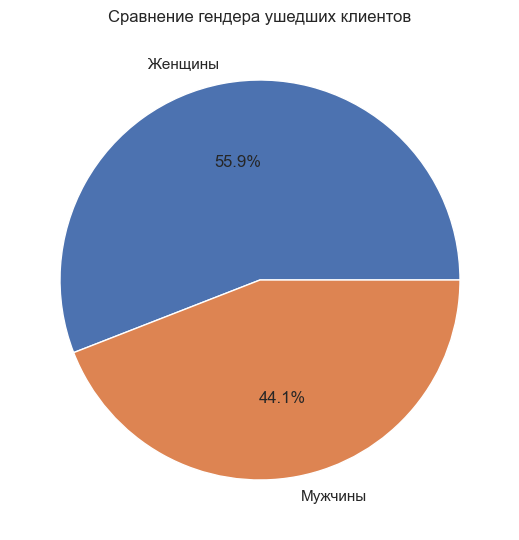

In [115]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(exited_df['Пол клиентов'].value_counts(), 
         labels=exited_df['Пол клиентов'].value_counts().index, 
         autopct='%.1f%%'
        ) 

axes.set_title('Сравнение гендера ушедших клиентов') 

### **Комментарий к заданию 9.6:** ###

*Так как опять у нас есть четко выраженная группа (ушедшие клиенты), разделенная на две категории, то наглядной является круговая диаграмма.*

*Мы видим, что среди ушедших клиентов больше женщин (56%).*

--------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Задание 9.7** #

Как отток клиентов зависит от числа приобретённых у банка услуг? 

Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Text(0.5, 1.0, 'Распределение лояльных/ушедших клиентов по количеству приобретенных продуктов')

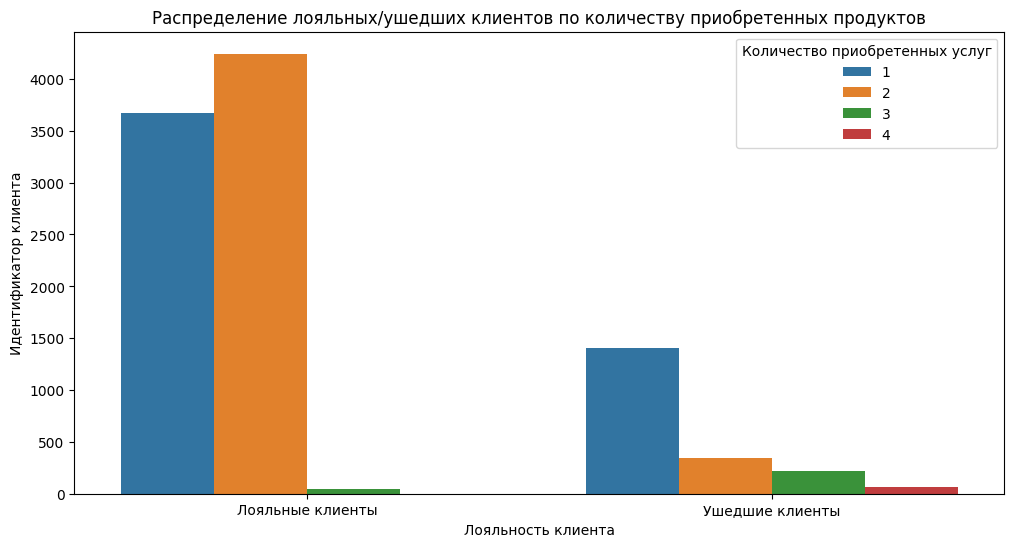

In [81]:
# Группируем данные по номерам продуктов, показателю лояльности и добавляем в DF признак для суммирования значений (любой подойдёт) 
grouped_of_products_df = churn_data.groupby(by=['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()

# Задаем осям и легенде понятные названия
grouped_of_products_df['Лояльность клиента'] = grouped_of_products_df['Exited'].apply(lambda x: 'Лояльные клиенты' if x == 0 else 'Ушедшие клиенты')
grouped_of_products_df['Идентификатор клиента'] = grouped_of_products_df['CustomerId']
grouped_of_products_df['Количество приобретенных услуг'] = grouped_of_products_df['NumOfProducts']

fig = plt.figure(figsize=(12, 6))

barplot = sns.barplot(data=grouped_of_products_df,
                      x='Лояльность клиента',
                      y='Идентификатор клиента',
                      hue='Количество приобретенных услуг'
                      )

barplot.set_title('Распределение лояльных/ушедших клиентов по количеству приобретенных продуктов')

### **Комментарий к заданию 9.7:** ###

*Многоуровневая столбчатая диаграмма показывает распределение количества продуктов внутри категорий ушедших/лояльных клиентов.*

*На графике видны следующие особенности:*
- *Ни у одного лояльного клиента нет 4 продуктов*
- *Большинство лояльных клиентов имеет 1 или 2 продукта*
- *Среди ушедших клиентов больше всего людей с одним продуктом*
- *Ушедших клиентов с тремя продуктами больше, чем лояльных клиентов с тремя продуктами*

*Т.е. с увеличением количества продуктов вырастает риск потери клиента.*

*Возможно ушедших клиентов можно разделить на две подкатегории: те, кто долго не задерживается в банке и тех, кто пробует разные продукты, но остается не удовлетворён какими-то услугами. Хороший повод поисследовать другие взаимосвязи.*

--------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Задание 9.8** #

Как влияет наличие статуса активного клиента на отток клиентов? 

Постройте диаграмму, иллюстрирующую это. 

Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Text(0.5, 1.0, 'Распределение лояльных/ушедших клиентов по признаку активности')

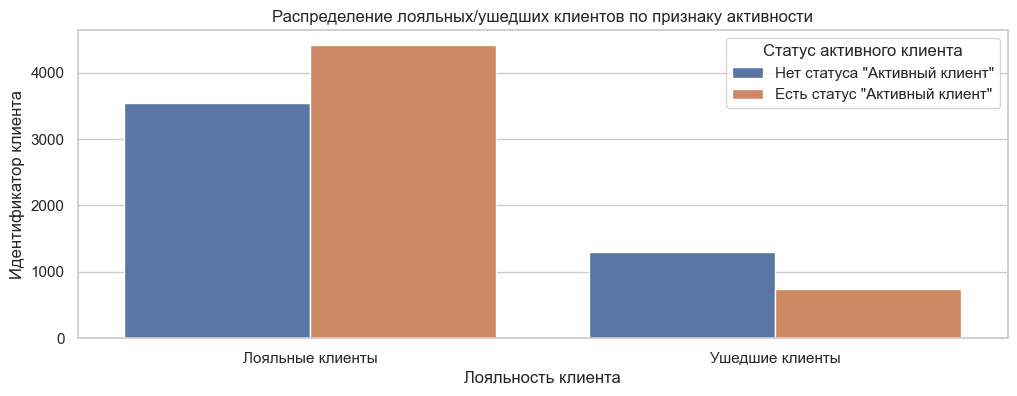

In [82]:
# Группируем данные по показателю активности, показателю лояльности и добавляем в DF признак для суммирования значений (любой подойдёт) 
grouped_of_active_df = churn_data.groupby(by=['IsActiveMember', 'Exited'], as_index=False)['CustomerId'].count()

# Задаем осям и легенде понятные названия
grouped_of_active_df['Лояльность клиента'] = grouped_of_active_df['Exited'].apply(lambda x: 'Лояльные клиенты' if x == 0 else 'Ушедшие клиенты')
grouped_of_active_df['Статус активного клиента'] = grouped_of_active_df['IsActiveMember'].apply(lambda x: 'Нет статуса "Активный клиент"' if x == 0 else 'Есть статус "Активный клиент"')
grouped_of_active_df['Идентификатор клиента'] = grouped_of_active_df['CustomerId']

fig = plt.figure(figsize=(12, 4))

sns.set_theme(style="whitegrid")

barplot = sns.barplot(data=grouped_of_active_df,
                      x='Лояльность клиента',
                      y='Идентификатор клиента',
                      hue='Статус активного клиента'
                      )

barplot.set_title('Распределение лояльных/ушедших клиентов по признаку активности')

### **Комментарий к заданию 9.8:** ###

*Многоуровневая столбчатая диаграмма показывает распределение клиентов со статусом активности внутри категорий ушедших/лояльных клиентов.*

*На графике видна зависимость статуса от лояльности.*

*Наличие активного статуса положительно влияет на лояльность. Т.е. среди ушедших клиентов большая часть не имела активного статуса, и наоборот среди лояльных клиентов большая часть клиентов имеет активный статус.*

*Значит банку стоит усилить привлечение клиентов в "лагерь активных".*

--------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Заданпие 9.9** #

В какой стране доля ушедших клиентов больше? 

Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 

Предположите, с чем это может быть связано.

In [83]:

# Группируем данные по показателю лояльности внутри стран и добавляем в DF признак для суммирования значений (любой подойдёт, берём CustomerId) 
grouped_of_country_exited_df = churn_data.groupby(by=['Geography', 'Exited'], as_index=False)['CustomerId'].count()
# Оставляем только ушедших
grouped_of_country_exited_df = grouped_of_country_exited_df[grouped_of_country_exited_df['Exited'] == 1]

# Снова группируем данные внутри стран и добавляем в DF признак для суммирования значений (подойдёт любой, кроме CustomerId, берём Surname) 
grouped_of_country_df = churn_data.groupby(by='Geography', as_index=False)['Surname'].count()

# Объединяме таблицы, теперь DF содержит сумму всех клиентов внутри стран в графе Surname и сумму ушедших в графе CustomerId
grouped_of_country_df = grouped_of_country_df.merge(grouped_of_country_exited_df, on='Geography', how='left')

# Чтобы найти долю ушедших клиентов, необходимо найти соотношении ушедших клиентов к сумме клиентов внутри каждой страны
# Для этого добавим в DF новый признак GeographyExited
grouped_of_country_df['GeographyExited'] = grouped_of_country_df['CustomerId'] / grouped_of_country_df['Surname'] * 100

# Задаем легенде понятное название
grouped_of_country_df['Доля ушедших клиентов'] = grouped_of_country_df['GeographyExited']

# Теперь можем строить график
fig = px.choropleth(grouped_of_country_df,
                    locations='Geography',
                    locationmode ='country names',
                    color='Доля ушедших клиентов',
                    range_color=[0, 100],
                    width=1000,
                    height=500,
                    color_continuous_scale='Reds'
                    )

fig.show()

### **Комментарий к заданию 9.9:** ###

*Тепловая картограмма показывает, что бОльшая часть ушедших клиентов находится в Германии. В остальных странах (Испания и Франция) доля ушедших клиентов примерно одинакова.*

*Можно предположить, что для жителей Германии есть более выгодные условия размещения денег, это может быть связано с разной политикой центральных банков стран и конкретно страны исследуемого банка, предположительно это Франция, так как большая часть клиентов - французы.*

*Так же учитывая выводы, полученные выше, мы можем предположить, что жители Германии хотят размещать бОльшие суммы денег на счетах, но не видят выгоду это делать в конкретном банке.*

--------------------------------------------------------------------------------------------------------------------------------------------------------------

In [84]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category')
churn_data['Tenure'] = churn_data['Tenure'].astype('category')
churn_data['Exited'] = churn_data['Exited'].astype('int64')

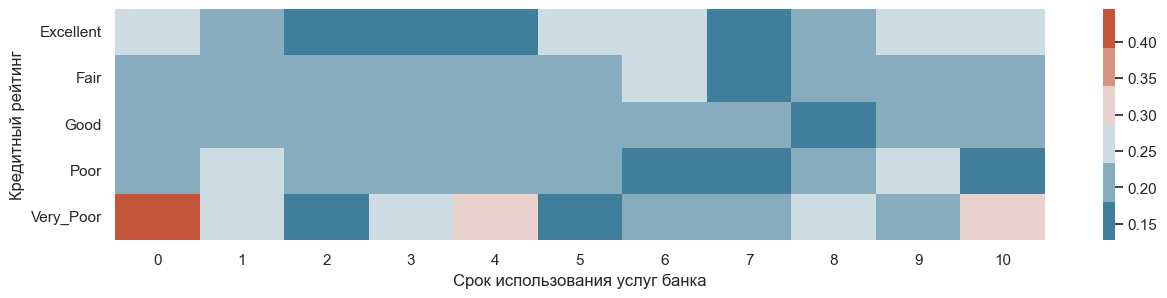

In [85]:
# Создаем копию DF для изменения названий осей и легенды
churn_data_copy = churn_data

# Задаем осям понятные названия
churn_data_copy['Кредитный рейтинг'] = churn_data_copy['CreditScoreCat']
churn_data_copy['Срок использования услуг банка'] = churn_data_copy['Tenure']

crs_tenure_pivot = churn_data_copy.pivot_table(values='Exited', index='Кредитный рейтинг', columns='Срок использования услуг банка', aggfunc='mean')

fig = plt.figure(figsize=(15, 3))
heatmap = sns.heatmap(data=crs_tenure_pivot, cmap=sns.diverging_palette(230, 20))

### **Комментарий к заданию 9.10:** ###

*Исходя из тепловой карты, мы видим:*

- *Чаще всего банк покидают люди с низким кредитным рейтингом и на первом году обслуживания*
- *Так же достаточно высок отток людей с низким рейтингом на 5 и 11 годах обслуживания*